In [1]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as  plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
#read the data
df = pd.read_csv('Downloads/home.csv')

In [5]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [7]:
df.shape

(48895, 16)

In [9]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [15]:
#check the missing values in the dataset
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [19]:
#check the mssing values in last review feature
df['last_review'][0:10]

0    2018-10-19
1    2019-05-21
2           NaN
3    2019-07-05
4    2018-11-19
5    2019-06-22
6    2017-10-05
7    2019-06-24
8    2017-07-21
9    2019-06-09
Name: last_review, dtype: object

In [21]:
# check the missing values in reviews_per_month feature
df['reviews_per_month'][0:10]

0    0.21
1    0.38
2     NaN
3    4.64
4    0.10
5    0.59
6    0.40
7    3.47
8    0.99
9    1.33
Name: reviews_per_month, dtype: float64

In [25]:
# check the missing value in host name feature
df['host_name'].value_counts()

host_name
Michael              417
David                403
Sonder (NYC)         327
John                 294
Alex                 279
                    ... 
Rhonycs                1
Brandy-Courtney        1
Shanthony              1
Aurore And Jamila      1
Ilgar & Aysel          1
Name: count, Length: 11452, dtype: int64

In [27]:
df['host_name'].value_counts().index[0:10]

Index(['Michael', 'David', 'Sonder (NYC)', 'John', 'Alex', 'Blueground',
       'Sarah', 'Daniel', 'Jessica', 'Maria'],
      dtype='object', name='host_name')

In [31]:
df['host_name'].value_counts().values[0:20]

array([417, 403, 327, 294, 279, 232, 227, 226, 205, 204, 194, 190, 187,
       182, 182, 160, 157, 154, 151, 146])

In [41]:
def barplot_function(x_value, y_value, data =  None, palette = 'viridis'):
    plt.figure(figsize = (10,10))
    if data:
        sns.barplot(x = x_value, y = y_value, data = data,  palette = palette)
    else:
        sns.barplot(x = x_value, y = y_value, data = data, palette = palette)
        plt.show()

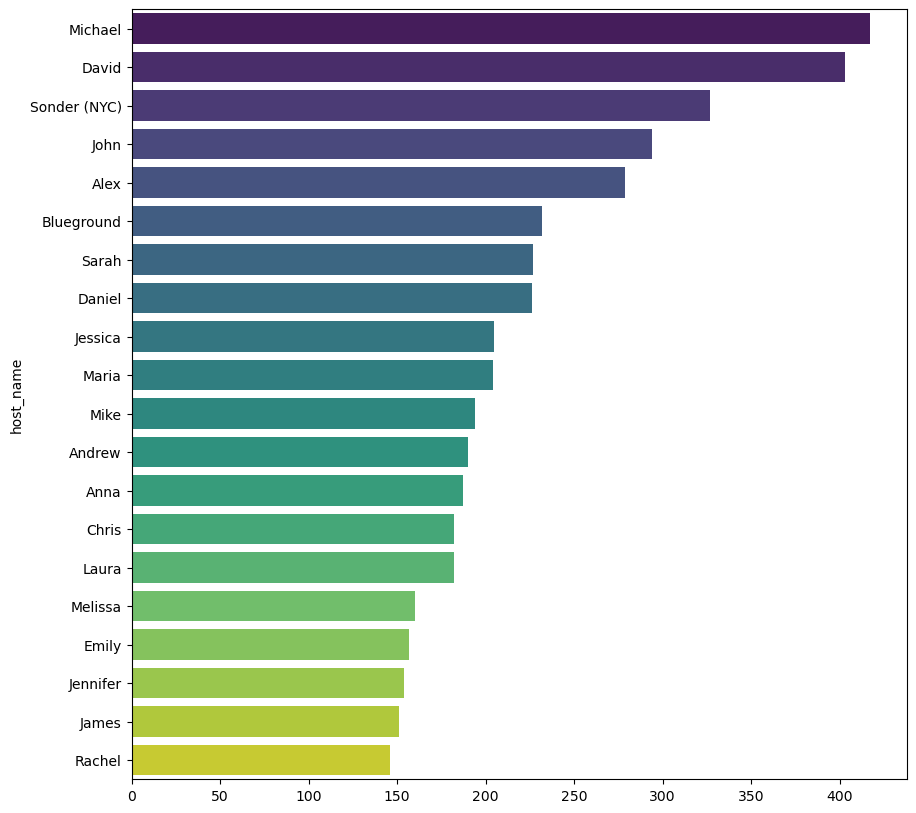

In [45]:
barplot_function(x_value  = df['host_name'].value_counts().values[0:20], y_value = df['host_name'].value_counts().index[0:20])

In [47]:
print('the total number of different hosts is: {}'.format(len(df['host_id'].unique())))

the total number of different hosts is: 37457


In [49]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [51]:
def kdeplot_function(x_value, dataset, color = 'blue'):
    plt.figure(figsize = (10,5))
    sns.kdeplot(x = x_value, data = dataset, color = color)
    plt.show()

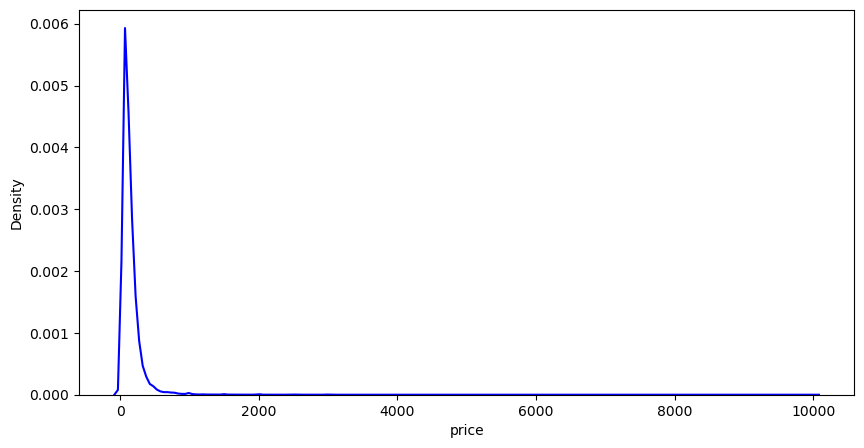

In [53]:
kdeplot_function(x_value = 'price', dataset = df)

In [55]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [57]:
df['room_type'].value_counts()

room_type
Entire home/apt    25409
Private room       22326
Shared room         1160
Name: count, dtype: int64

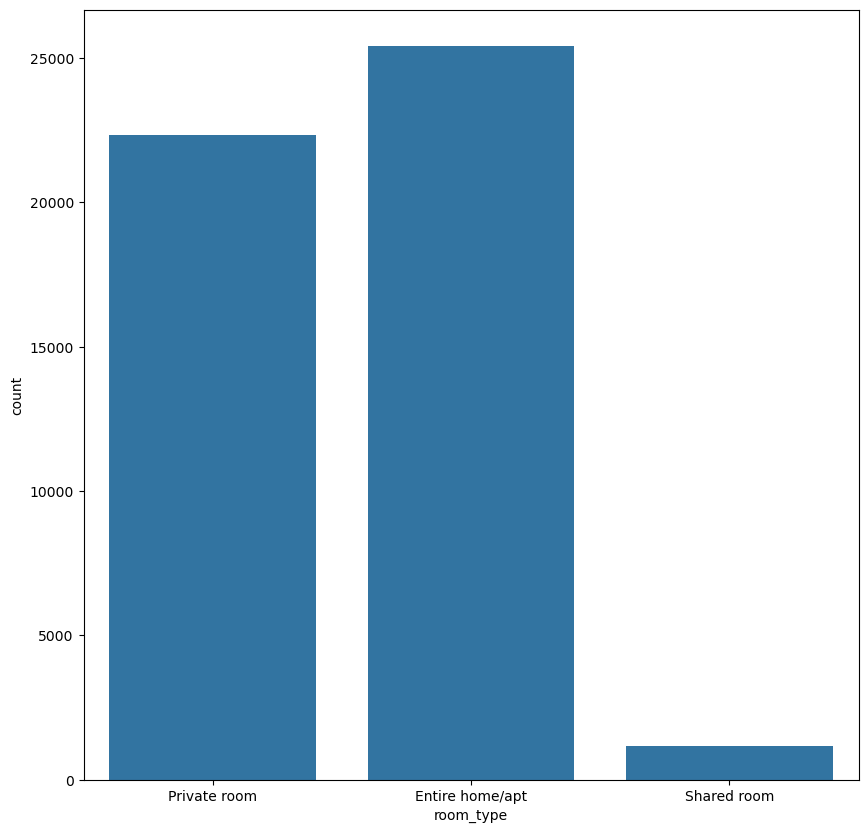

In [59]:
plt.figure(figsize = (10, 10))
sns.countplot(x = 'room_type', data = df)
plt.show()

In [61]:
df['name'].value_counts()

name
Hillside Hotel                                        18
Home away from home                                   17
New york Multi-unit building                          16
Brooklyn Apartment                                    12
Loft Suite @ The Box House Hotel                      11
                                                      ..
Large 1BR Apt. in Williamsburg                         1
Feel at Home                                           1
Spacious Modern Alcove Studio in a Luxury Building     1
Artist's Room in Large Apartment                       1
Trendy duplex in the very heart of Hell's Kitchen      1
Name: count, Length: 47905, dtype: int64

In [63]:
df ['host_id'].value_counts()

host_id
219517861    327
107434423    232
30283594     121
137358866    103
16098958      96
            ... 
23727216       1
89211125       1
19928013       1
1017772        1
68119814       1
Name: count, Length: 37457, dtype: int64

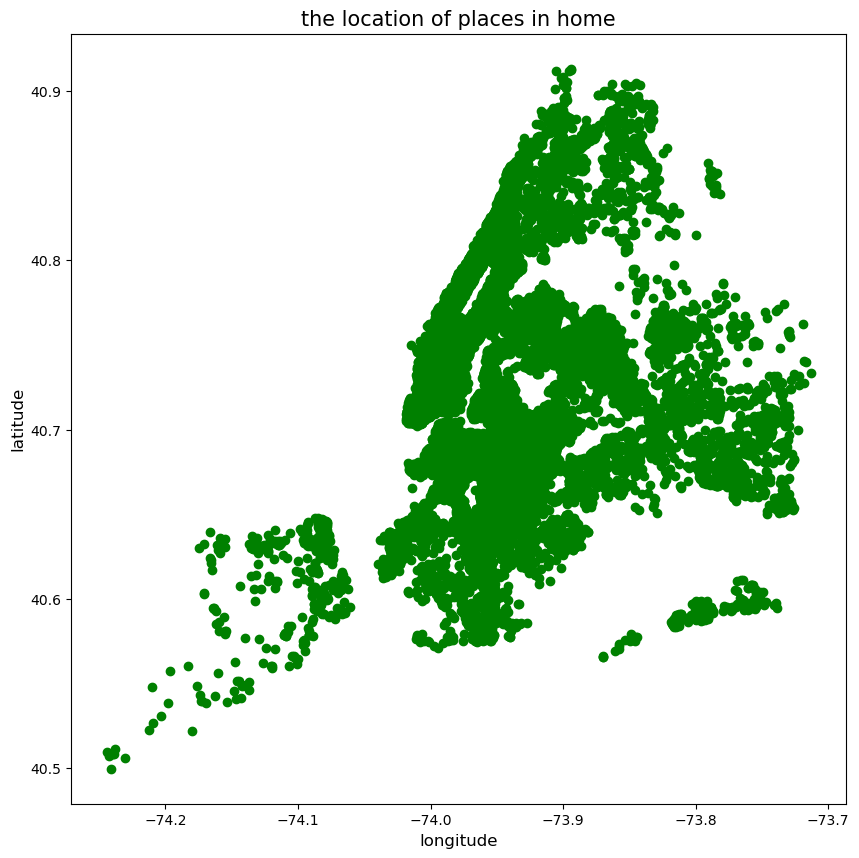

In [69]:
plt.figure(figsize = (10,10))
plt.scatter(x = df['longitude'], y = df['latitude'], color = 'green')
plt.xlabel('longitude', fontsize = 12)
plt.ylabel('latitude', fontsize  = 12)
plt.title('the location of places in home', fontsize = 15)
plt.show()

In [71]:
from termcolor import colored

In [75]:
percentage_of_missing_values = np.round(sum(df['last_review'].isna()) / len(df['last_review']) * 100, 2)
missing_values_colored = colored(percentage_of_missing_values, 'blue')
colored_feature = colored('last_review', 'green')
print('the percentage of missing values for '" + colored_feature is: {}%'".format(missing_values_colored))

the percentage of missing values for  + colored_feature is: 20.56%'


In [87]:
percentage_of_missing_values = np.round(sum(df['reviews_per_month'].isna()) / len(df['reviews_per_month']) * 100, 2)
missing_values_colored = colored(percentage_of_missing_values, 'green')
colored_feature = colored('reviews_per_month', 'blue')
print('the percentage of missing values for '" + colored_feature is: {}%'".format(missing_values_colored))

the percentage of missing values for  + colored_feature is: 20.56%'


In [89]:
date_split = df['last_review'].iloc[0].split('-')

In [95]:
year_first_example = date_split[0]
month_first_example = date_split[1]
day_first_example = date_split[2]

In [97]:
year_first_example, month_first_example, day_first_example

('2018', '10', '19')

In [109]:
def date_splitter(data, feature):
    year_list = []
    month_list = []
    day_list = []
    data_copy = data.copy()
    data_copy.dropna(inplace = True)
    for i in range(len(data_copy[feature])):
        data_split = data_copy[feature].iloc[i].split('-')
        year_list.append(data_split[0])
        month_list.append(data_split[1])
        day_list.append(data_split[2])
    return year_list, month_list, day_list

In [111]:
df_copy = df.copy()

In [113]:
years, months, days = date_splitter(df_copy, feature = 'last_review')

In [115]:
from statistics import mode

In [117]:
mode_years = mode(years)
mode_months = mode(months)
mode_days = mode(days)

In [119]:
mode_years

'2019'

In [123]:
mode_days

'01'

In [125]:
mode_date = mode_years + '-' + mode_months + '-' + mode_days

In [127]:
mode_date

'2019-06-01'

In [129]:
from sklearn.impute import SimpleImputer

In [130]:
df_copy.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [133]:
df_copy['last_review'].fillna(mode_date, inplace = True)

In [135]:
percentage_of_missing_values = np.round(sum(df['reviews_per_month'].isna()) / len(df['reviews_per_month']) * 100, 2)
missing_values_colored = colored(percentage_of_missing_values, 'green')
colored_feature = colored('reviews_per_month', 'blue')
print('the percentage of missing values for '" + colored_feature is: {}%'".format(missing_values_colored))

the percentage of missing values for  + colored_feature is: 20.56%'


In [137]:
df_copy['reviews_per_month']

0        0.21
1        0.38
2         NaN
3        4.64
4        0.10
         ... 
48890     NaN
48891     NaN
48892     NaN
48893     NaN
48894     NaN
Name: reviews_per_month, Length: 48895, dtype: float64

In [143]:
def mean_or_median_finder(data, feature, mean_impute = True):
    temp_data = data.copy()
    temp_data.dropna(inplace = True)
    if mean_impute:
        mean_of_series = np.mean(temp_data[feature])
        return  temp_data, mean_of_series
    else:
        median_of_series = np.median(temp_data[feature])
        return temp_data, median_of_series

In [145]:
temp_data, mean_reviews = mean_or_median_finder(df_copy, feature = 'reviews_per_month', mean_impute = True)

In [147]:
temp_data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129


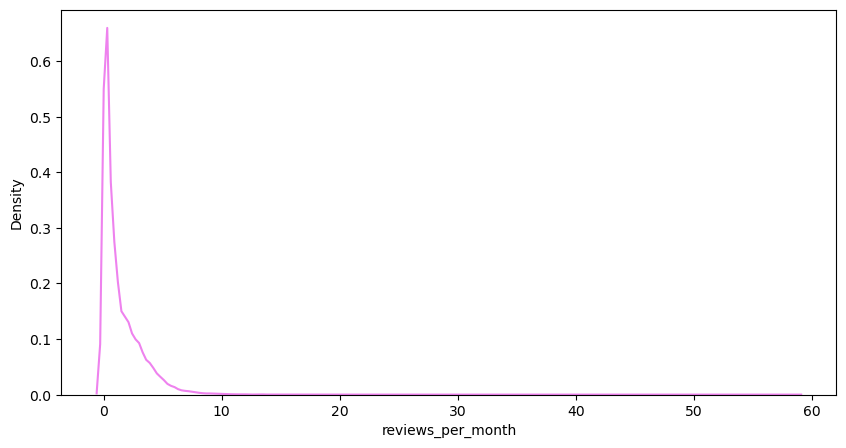

In [159]:
plt.figure(figsize = (10,5))
sns.kdeplot(x = 'reviews_per_month', data = temp_data, color = 'violet')
plt.show()

In [161]:
temp_data, median_reviews = mean_or_median_finder(data = df_copy, feature  = 'reviews_per_month', mean_impute = False)

In [163]:
median_reviews

0.72

In [165]:
df_copy.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,2019-06-01,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [167]:
df_copy['reviews_per_month'] = df_copy['reviews_per_month'].fillna(median_reviews)

In [169]:
df_copy.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,2019-06-01,0.72,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [179]:
df_copy['last_review_year'] = df_copy['last_review'].apply(lambda x: x[0:4])
df_copy['last_review_month']  = df_copy['last_review'].apply(lambda x: x[5:7])

In [183]:
df_copy['last_review_year']

0        2018
1        2019
2        2019
3        2019
4        2018
         ... 
48890    2019
48891    2019
48892    2019
48893    2019
48894    2019
Name: last_review_year, Length: 48895, dtype: object

In [187]:
df_copy['last_review_month']

0        10
1        05
2        06
3        07
4        11
         ..
48890    06
48891    06
48892    06
48893    06
48894    06
Name: last_review_month, Length: 48895, dtype: object

In [189]:
df_copy.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,last_reviews_year,last_review_month,last_review_year
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,2018,10,2018
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,2019,05,2019
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,2019-06-01,0.72,1,365,2019,06,2019
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,2019,07,2019
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,2018,11,2018


In [191]:
df_copy.drop('last_review', axis = 1, inplace = True)

In [193]:
df_copy.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,last_reviews_year,last_review_month,last_review_year
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365,2018,10,2018
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355,2019,05,2019
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.72,1,365,2019,06,2019
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194,2019,07,2019
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0,2018,11,2018


In [197]:
len(df_copy['id'].unique())

48895

In [199]:
df_copy['neighbourhood_group'].value_counts()

neighbourhood_group
Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: count, dtype: int64

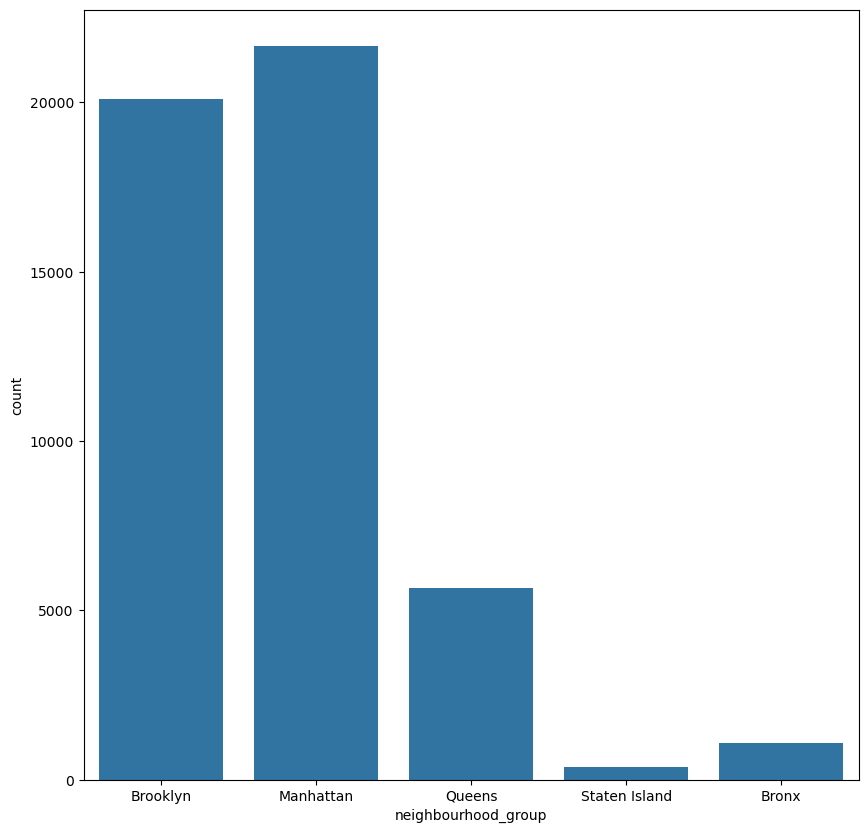

In [201]:
plt.figure(figsize = (10, 10))
sns.countplot(x = 'neighbourhood_group', data = df_copy)
plt.show()

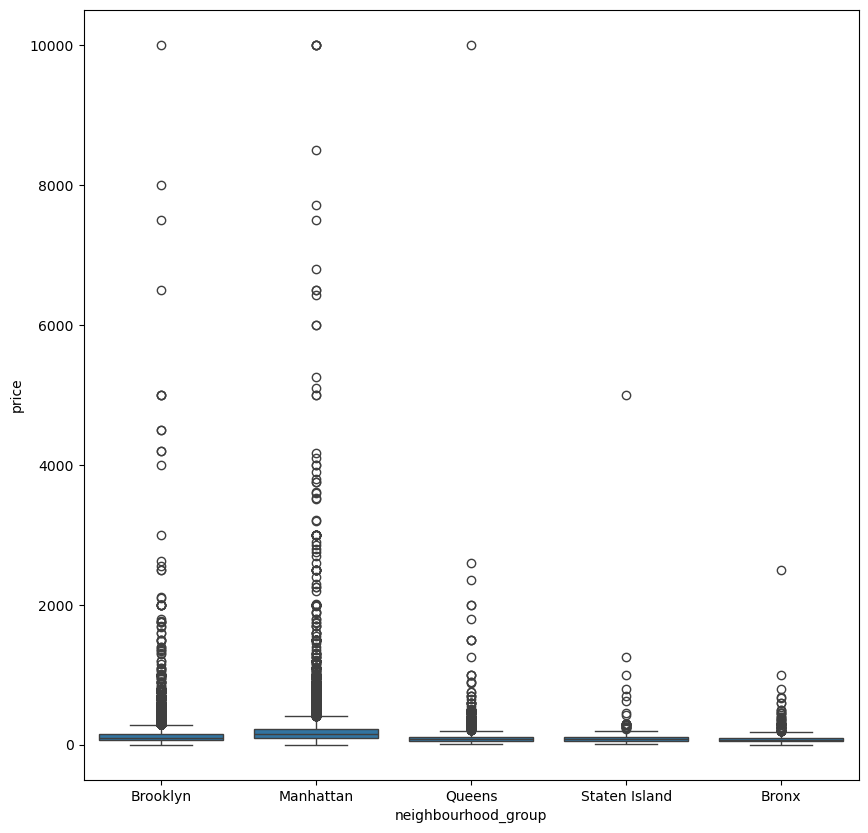

In [203]:
plt.figure(figsize = (10, 10))
sns.boxplot(x = 'neighbourhood_group', y = 'price', data = df_copy)
plt.show()

In [205]:
np.percentile(df_copy['price'], 50)

106.0

In [207]:
np.percentile(df_copy['price'],  99)

799.0

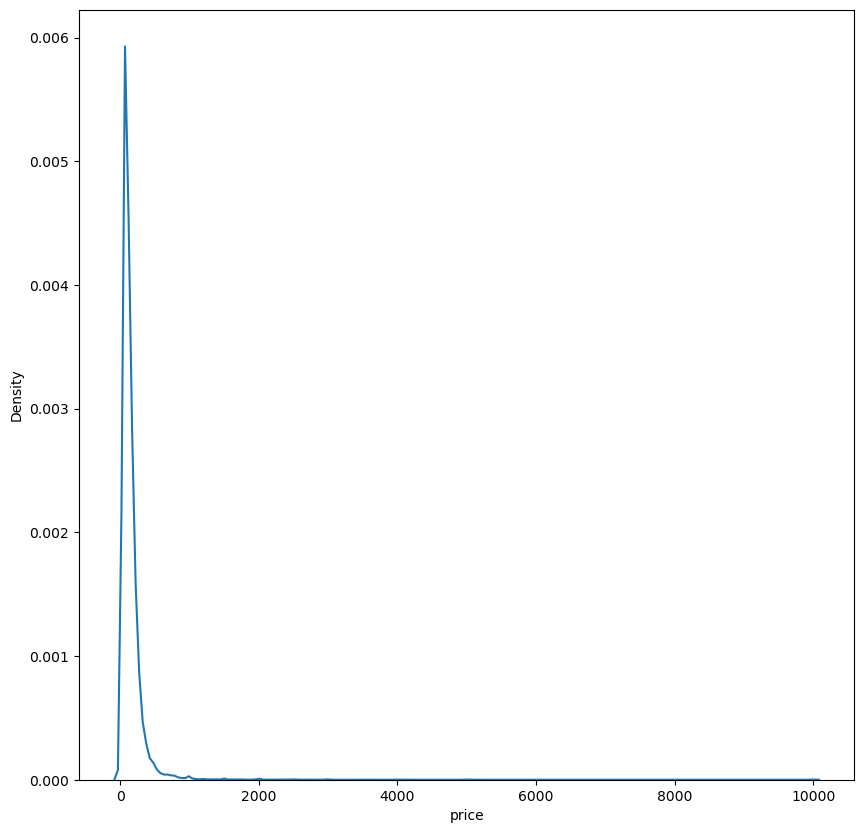

In [209]:
plt.figure(figsize = (10, 10))
sns.kdeplot(df_copy['price'])
plt.show()

In [211]:
len (df_copy['price'])

48895

In [221]:
def outliers_remover(data, feature, remove_outliers = True):
    temp_data = data.copy()
    if remove_outliers:
        outlier_points =  np.percentile(df_copy[feature], 99)
        temp_data_outliers_removed = temp_data[temp_data[feature] < outlier_points]
        outliers = temp_data[temp_data[feature] > outlier_points]
        outliers_removed = len(outliers)
        print('the percentage of outliers removed: {}%'.format((outliers_removed) / len(temp_data) * 100))
        return outliers, temp_data_outliers_removed
    else:
        return temp_data

In [223]:
outliers, df_outliers_removed = outliers_remover(df_copy, feature = 'price')

the percentage of outliers removed: 0.9694242765108907%


In [225]:
len(df_outliers_removed)

48403

In [227]:
len(outliers)

474

In [229]:
outliers.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,last_reviews_year,last_review_month,last_review_year
85,19601,perfect for a family or small group,74303,Maggie,Brooklyn,Brooklyn Heights,40.69723,-73.99268,Entire home/apt,800,1,25,0.24,1,7,2016,08,2016
496,174966,Luxury 2Bed/2.5Bath Central Park View,836168,Henry,Manhattan,Upper West Side,40.77350,-73.98697,Entire home/apt,2000,30,30,0.33,11,0,2018,05,2018
662,250801,Heart & Soul of Greenwich Village,1314834,Rhona,Manhattan,Greenwich Village,40.73129,-73.99944,Entire home/apt,850,3,107,1.15,1,249,2019,05,2019
762,273190,6 Bedroom Landmark West Village Townhouse,605463,West Village,Manhattan,West Village,40.73301,-74.00268,Entire home/apt,1300,5,28,0.31,4,297,2018,09,2018
780,279857,#1 Yellow Block BnB/see at Net Flix Show Stay ...,1420300,Gordy,Brooklyn,Bedford-Stuyvesant,40.68492,-73.95489,Entire home/apt,800,4,122,1.37,1,257,2019,07,2019


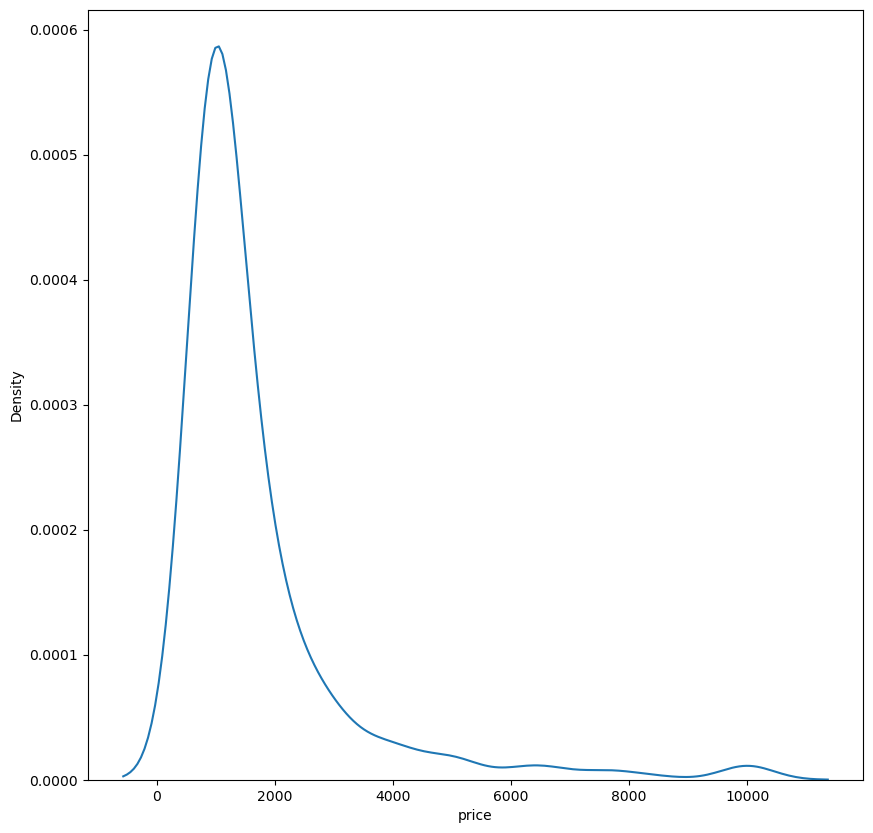

In [231]:
plt.figure(figsize = (10, 10))
sns.kdeplot(outliers['price'])
plt.show()

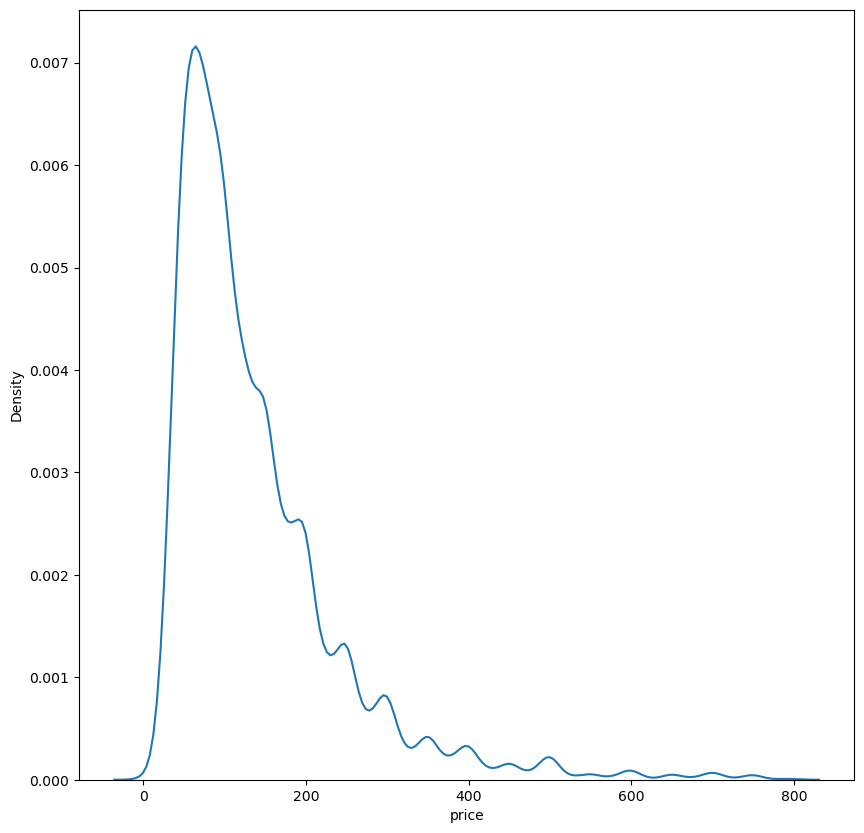

In [233]:
plt.figure(figsize = (10, 10))
sns.kdeplot(df_outliers_removed['price'])
plt.show()

In [235]:
df_copy = df_outliers_removed.copy()

In [237]:
df_copy.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,last_reviews_year,last_review_month,last_review_year
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365,2018,10,2018
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355,2019,05,2019
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.72,1,365,2019,06,2019
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194,2019,07,2019
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0,2018,11,2018


In [239]:
df_copy.drop(['name', 'host_id', 'host_name', 'id'], axis =1, inplace =True)

In [241]:
df_copy.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,last_reviews_year,last_review_month,last_review_year
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365,2018,10,2018
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355,2019,05,2019
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.72,1,365,2019,06,2019
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194,2019,07,2019
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0,2018,11,2018


In [245]:
df_copy.shape

(48403, 14)

In [247]:
df_copy = pd.get_dummies(df_copy, columns = ['neighbourhood_group', 'neighbourhood', 'room_type'], drop_first = True)

In [249]:
#implement decision tree, random forest and Neural network for our predictions.
from sklearn.model_selection import train_test_split

In [255]:
X = df_copy.drop(['price'],  axis = 1)
y = df_copy['price']

In [257]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 101)

In [259]:
X_train.shape

(38722, 235)

In [261]:
X_test.shape

(9681, 235)

In [267]:
from sklearn.preprocessing import StandardScaler

In [271]:
scaler = StandardScaler()

In [273]:
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [275]:
X_train_scaled[0:5]

array([[-0.44860626,  0.17844211, -0.04765725, ..., -0.06984847,
        -0.92386441, -0.15695699],
       [-0.7909645 , -1.00203319,  1.17662428, ..., -0.06984847,
        -0.92386441, -0.15695699],
       [ 0.51872073, -0.42762484, -0.29251356, ..., -0.06984847,
         1.08240992, -0.15695699],
       [-0.29612122, -0.12188087, -0.29251356, ..., -0.06984847,
         1.08240992, -0.15695699],
       [ 1.93818785,  0.28664512, -0.29251356, ..., -0.06984847,
         1.08240992, -0.15695699]])

In [277]:
#decision tree
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from tqdm import tqdm

In [279]:
max_depth_values = [2,3,4,5,8,10,12,15]
cross_validation_error_values = []
cv = 10
for depth in tqdm(max_depth_values):
    model = DecisionTreeRegressor()
    cross_validation_error = -cross_val_score(model, X_train_scaled, y_train, scoring = 'neg_mean_squared_error', cv = cv).mean()
    cross_validation_error_values.append(cross_validation_error)

100%|█████████████████████████████████████████████| 8/8 [01:37<00:00, 12.17s/it]


In [281]:
def lineplot_function_tree(x_value, y_value, font_size = 15):
    plt.figure(figsize = (10, 10))
    plt.plot(x_value, y_value)
    sns.scatterplot(x = x_value, y = y_value, color = 'red')
    plt.xlabel('max depth values')
    plt.ylabel('cross  validation error values')
    plt.title('max depth values vs cross validation error values', fontsize = font_size)
    plt.show()

In [283]:
cross_validation_error_values

[10489.863497875736,
 10480.660473834268,
 10554.97918878552,
 10470.892844327278,
 10487.861918181445,
 10504.944007450928,
 10499.720537999616,
 10454.389315013026]

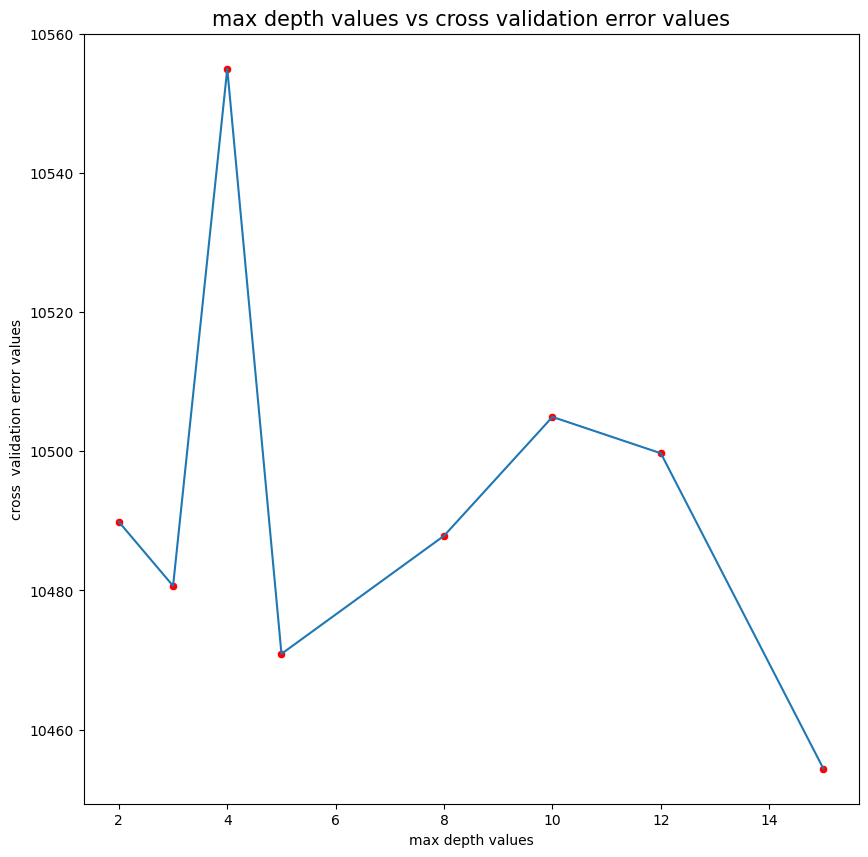

In [285]:
lineplot_function_tree(x_value = max_depth_values, y_value = cross_validation_error_values)

In [287]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
import seaborn as sns
from sklearn import tree

In [289]:
best_max_depth = 2

In [291]:
model =  DecisionTreeRegressor(max_depth = best_max_depth)
model.fit(X_train_scaled, y_train)
y_predictions = model.predict(X_test_scaled)

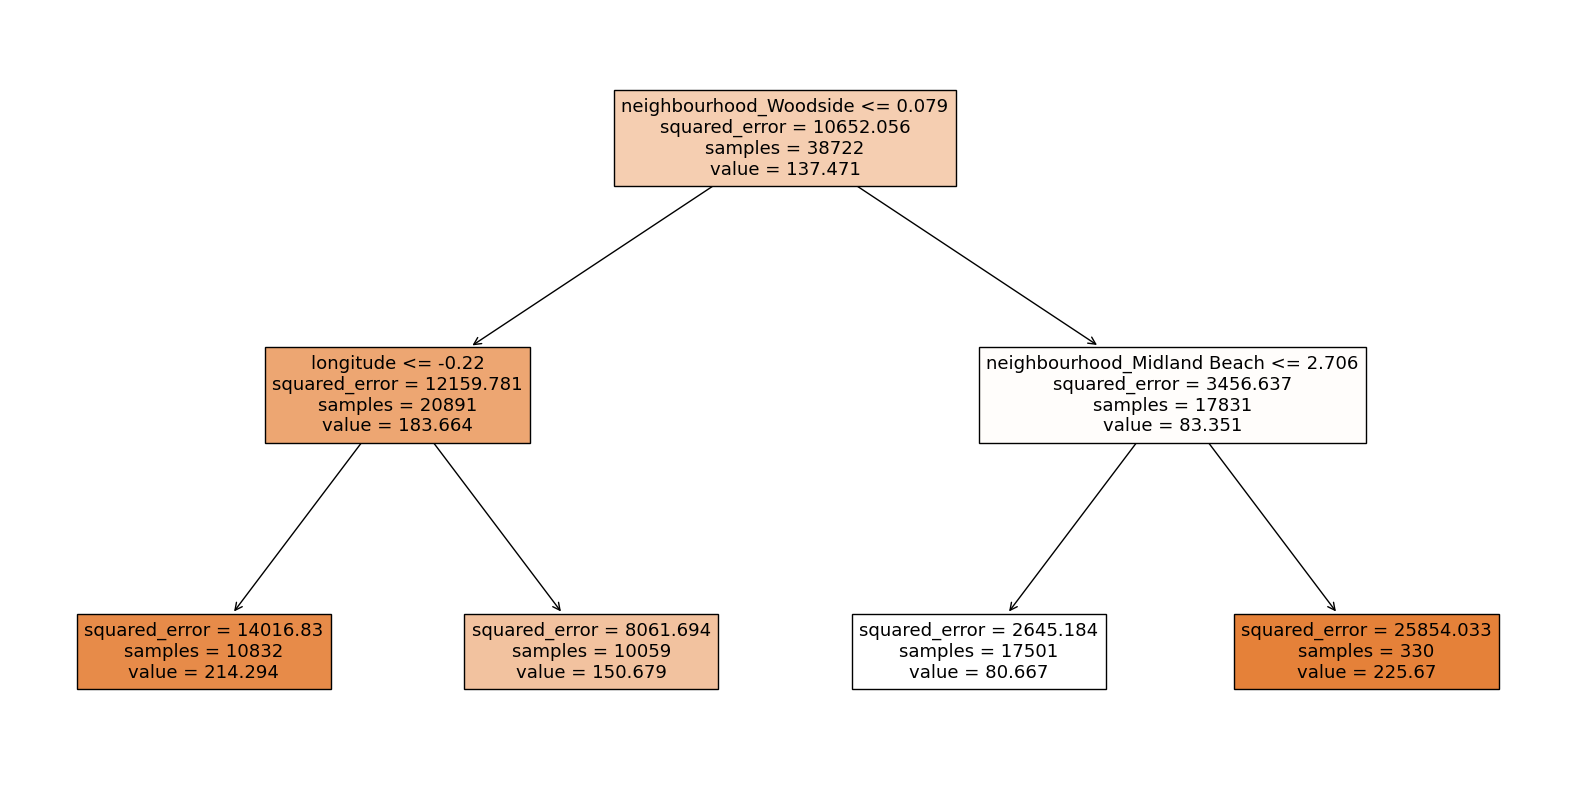

In [295]:
plt.figure(figsize = (20, 10))
tree.plot_tree(model, filled = True, feature_names = df_copy.columns)
plt.show()

In [299]:
min_samples_leaf_values = [15, 25, 50, 100, 200, 400, 1000, 2000, 5000]
MSE_values = []
cv = 10
for min_samples_leaf in tqdm(min_samples_leaf_values):
    model = DecisionTreeRegressor(min_samples_leaf = min_samples_leaf, random_state =  101)
    cross_validation_scores = -cross_val_score(model, X_train_scaled, y_train, cv = cv, scoring = 'neg_mean_squared_error').mean()
    MSE_values.append(cross_validation_scores)

100%|█████████████████████████████████████████████| 9/9 [01:12<00:00,  8.07s/it]


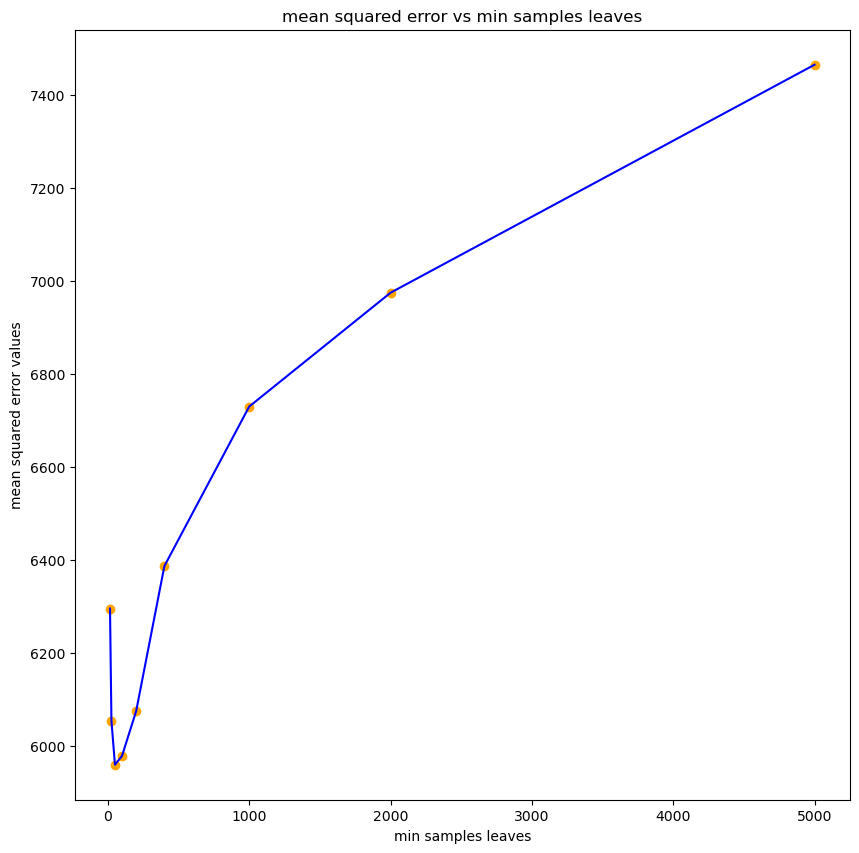

In [301]:
plt.figure(figsize = (10, 10))
sns.lineplot(x = min_samples_leaf_values, y = MSE_values, color = 'blue')
plt.scatter(x = min_samples_leaf_values, y = MSE_values, color = 'orange')
plt.xlabel('min samples leaves')
plt.ylabel('mean squared error values')
plt.title('mean squared error vs min samples leaves')
plt.show()

In [303]:
min_samples_split_values =  [15, 20, 50, 100, 200, 400, 500, 1000, 2000, 5000]

MSE_values = []
cv = 10
for min_samples in tqdm(min_samples_split_values):
    model = DecisionTreeRegressor(min_samples_split = min_samples, random_state =  101)
    cross_validation_scores = -cross_val_score(model, X_train_scaled, y_train, cv = cv, scoring = 'neg_mean_squared_error').mean()
    MSE_values.append(cross_validation_scores)

100%|███████████████████████████████████████████| 10/10 [01:38<00:00,  9.85s/it]


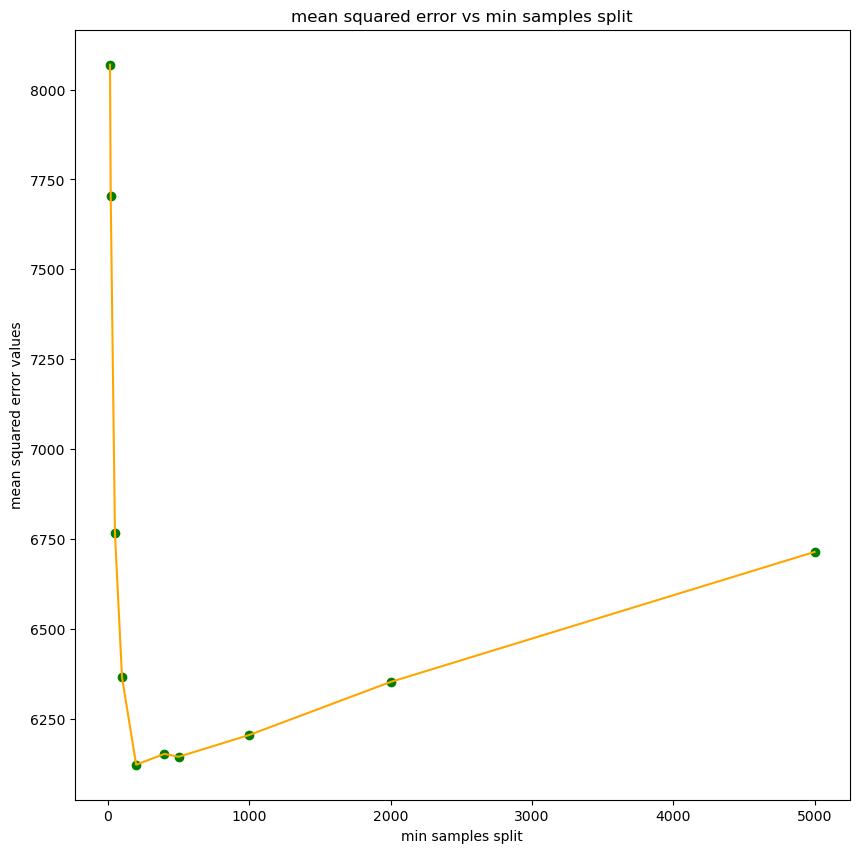

In [305]:
plt.figure(figsize =  (10, 10))
sns.lineplot(x = min_samples_split_values, y = MSE_values, color = 'orange')
plt.scatter(x = min_samples_split_values, y = MSE_values, color = 'green')
plt.xlabel('min samples split')
plt.ylabel('mean squared error values')
plt.title('mean squared error vs min samples split')
plt.show()

In [307]:
best_max_depth = 2
best_min_samples_split = 200
best_min_samples_leaves = 50

In [309]:
model = DecisionTreeRegressor(max_depth = best_max_depth, min_samples_split =  best_min_samples_split, min_samples_leaf = best_min_samples_leaves)
model.fit(X_train_scaled, y_train)
y_predictions = model.predict(X_test_scaled)

In [311]:
mean_squared_error(y_predictions, y_test)

7374.757902487385

In [313]:
mean_absolute_error(y_predictions, y_test)

55.09028473554134

In [315]:
def scatterplot_function_evaluation(x_value, y_value, fig_size = (10, 10), color = 'green', font_size = 15):
    plt.figure(figsize = fig_size)
    sns.scatterplot(x_value, y_value, color = color)
    plt.title('Y predictions vs Y actual', fontsize = font_size)
    plt.xlabel('Y prediction')
    plt.ylabel('Y actual')
    plt.show()

In [317]:
# random forest
from sklearn.ensemble import RandomForestRegressor

In [321]:
number_of_estimator_values = [100, 200, 400, 800]

cv = 2
MSE_values = []
for number_of_estimator in tqdm (number_of_estimator_values):
    model = RandomForestRegressor(n_estimators = number_of_estimator, random_state = 101, n_jobs = -1)
    cross_validation_score = -cross_val_score(model, X_train_scaled, y_train, cv = cv, scoring = 'neg_mean_squared_error').mean()
    MSE_values.append(cross_validation_score)

100%|████████████████████████████████████████████| 4/4 [09:16<00:00, 139.01s/it]


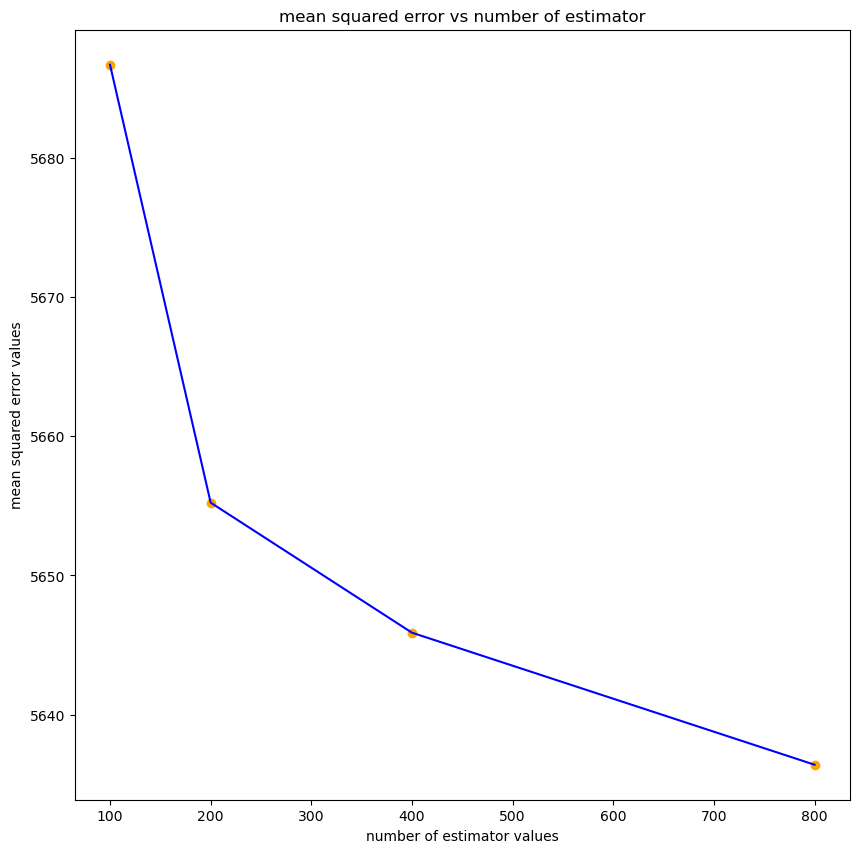

In [323]:
plt.figure(figsize = (10, 10))
sns.lineplot(x = number_of_estimator_values, y  = MSE_values, color = 'blue')
plt.scatter(x = number_of_estimator_values, y = MSE_values, color = 'orange')
plt.xlabel('number of estimator values')
plt.ylabel('mean squared error values')
plt.title('mean squared error vs number of estimator')
plt.show()

In [342]:
number_of_features_values = [1, 10, 12, 15, 20, 50, 100]
MSE_values = []
for number_of_features in tqdm(number_of_features_values):
    model = RandomForestRegressor(max_features = number_of_features, random_state = 101, n_jobs = -1)
    cross_validation_score = -cross_val_score(model, X_train_scaled, y_train, scoring = 'neg_mean_squared_error').mean()

100%|█████████████████████████████████████████████| 7/7 [04:59<00:00, 42.82s/it]


In [347]:
mean_squared_error(y_predictions, y_test)

7374.757902487385

In [349]:
mean_absolute_error(y_predictions, y_test)

55.09028473554134

In [353]:
# gradient boost
from sklearn.ensemble import GradientBoostingRegressor

In [355]:
n_estimators = [10, 25, 50, 100, 150, 200]
cv = 2
cross_validation_score_values = []
for estimators in tqdm(n_estimators):
    model = GradientBoostingRegressor(n_estimators = estimators)
    cross_validation_score = -cross_val_score(model, X_train_scaled, y_train, cv =cv, scoring = 'neg_mean_squared_error').mean()
    cross_validation_score_values.append(cross_validation_score)

100%|█████████████████████████████████████████████| 6/6 [04:16<00:00, 42.83s/it]


In [357]:
def lineplot_function(x_label, y_label, x_value, y_value, color1 = 'green', color2 = 'blue', figsize = (10, 10)):
    plt.figure(figsize =  figsize)
    sns.lineplot(x = x_value, y =  y_value, color = color1)
    sns.scatterplot(x = x_value, y = y_value, color = color2)
    plt.xlabel(x_label, fontsize = 10)
    plt.ylabel(y_label, fontsize = 10)
    plt.title(f'{x_label} vs {y_label} values', fontsize = 15)
    plt.show()

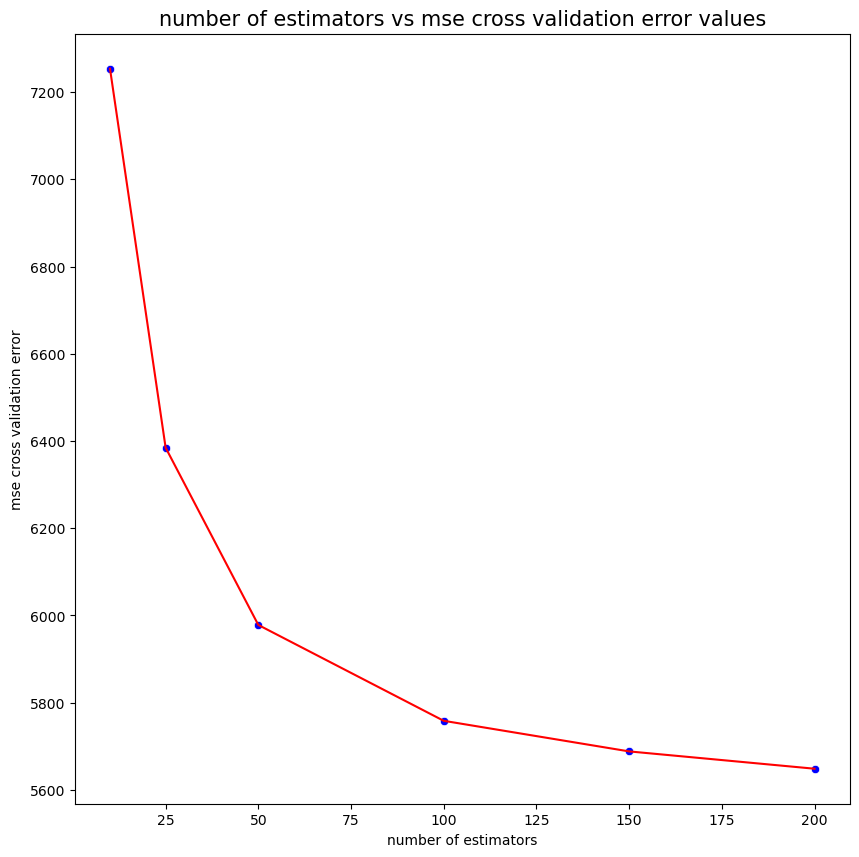

In [359]:
lineplot_function(x_value = n_estimators, y_value = cross_validation_score_values, x_label = 'number of estimators', y_label = 'mse cross validation error', color1 = 'red')

In [361]:
max_depth_values = [1, 2,3, 5, 7, 10]
cv =  10
cross_validation_score_values = []
for max_depth in tqdm(max_depth_values):
    model = GradientBoostingRegressor(max_depth = max_depth, n_estimators = 10)
    cross_validation_score = -cross_val_score(model, X_train_scaled, y_train, cv = cv, scoring = 'neg_mean_squared_error').mean()

100%|█████████████████████████████████████████████| 6/6 [06:24<00:00, 64.07s/it]


In [366]:
mean_squared_error(y_predictions,y_test)

7374.757902487385

In [368]:
mean_absolute_error(y_predictions, y_test)

55.09028473554134

In [378]:
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential

2024-11-15 17:32:28.592986: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [380]:
n_columns = len(X_train_scaled[0])

In [382]:
model = Sequential()
model.add(Dense(100, activation = 'relu', input_shape = (n_columns,)))
model.add(Dense(50, activation = 'relu'))
model.add(Dense(1, activation = 'linear'))
model.compile(optimizer = 'adam', loss  = 'mean_squared_error', metrics = ['mean_absolute_error'])

In [384]:
model.fit(X_train, y_train, epochs = 10, batch_size  = 10)

Epoch 1/10
3873/3873 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 11847.8555 - mean_absolute_error: 76.3563
Epoch 2/10
3873/3873 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 9050.0107 - mean_absolute_error: 64.5366
Epoch 3/10
3873/3873 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 7571.7632 - mean_absolute_error: 56.7291
Epoch 4/10
3873/3873 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: 6817.5186 - mean_absolute_error: 53.6917
Epoch 5/10
3873/3873 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: 6881.7817 - mean_absolute_error: 53.4296
Epoch 6/10
3873/3873 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - loss: 6951.9526 - mean_absolute_error: 52.9870
Epoch 7/10
3873/3873 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: 6603.9395 - mean_absolute_error: 51.7094
Epoch 8/10
3873/3873 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 6668.2246 - mean_absolute_error: 51.5402
Epoch 9/10
3873/3873 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 6611.2393 - mean_absolute_error: 51.1963
Epoch 10/10
3873/3873 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 65

In [386]:
y_predictions =model.predict(X_test)

303/303 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [388]:
mean_squared_error(y_predictions, y_test)

6384.4947192059735

In [390]:
mean_absolute_error(y_predictions, y_test)

54.38771184718925

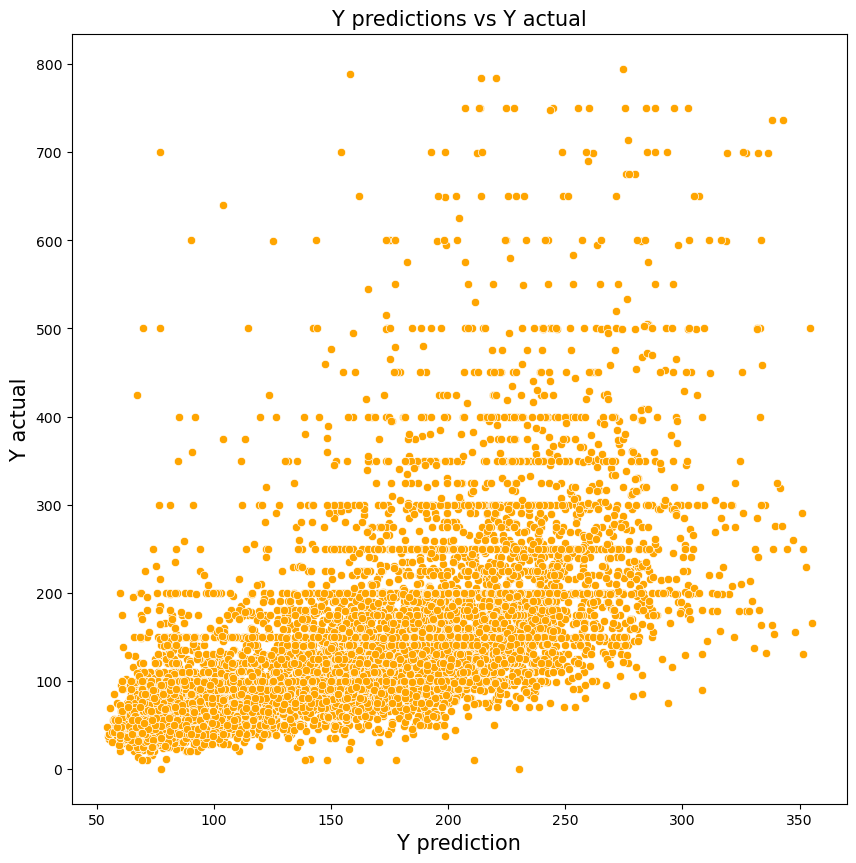

In [398]:
scatterplot_function_evaluation(y_predictions.flatten(), y_test, color='orange')

In [400]:
model = Sequential()
model.add(Dense(100, activation = 'relu', input_shape = (n_columns,)))
model.add(Dense(50, activation = 'relu'))
model.add(Dense(10, activation = 'relu'))
model.add(Dense(1, activation = 'linear'))
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['mean_absolute_error'])

In [402]:
model.fit(X_train, y_train, epochs = 10, batch_size = 10)

Epoch 1/10
3873/3873 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 10672.6045 - mean_absolute_error: 73.0680
Epoch 2/10
3873/3873 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: 9648.7275 - mean_absolute_error: 68.3177
Epoch 3/10
3873/3873 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 7117.1108 - mean_absolute_error: 55.1887
Epoch 4/10
3873/3873 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 7044.6938 - mean_absolute_error: 53.8438
Epoch 5/10
3873/3873 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: 6897.3257 - mean_absolute_error: 52.9004
Epoch 6/10
3873/3873 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 6608.2583 - mean_absolute_error: 51.5151
Epoch 7/10
3873/3873 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - loss: 6685.2588 - mean_absolute_error: 51.7254
Epoch 8/10
3873/3873 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 6438.1396 - mean_absolute_error: 50.8215
Epoch 9/10
3873/3873 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 6656.9712 - mean_absolute_error: 51.6204
Epoch 10/10
3873/3873 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 6

In [404]:
y_predictions = model.predict(X_test)

303/303 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [406]:
mean_squared_error(y_predictions, y_test)

6160.599012523391

In [408]:
mean_absolute_error(y_predictions, y_test)

51.050722224839696

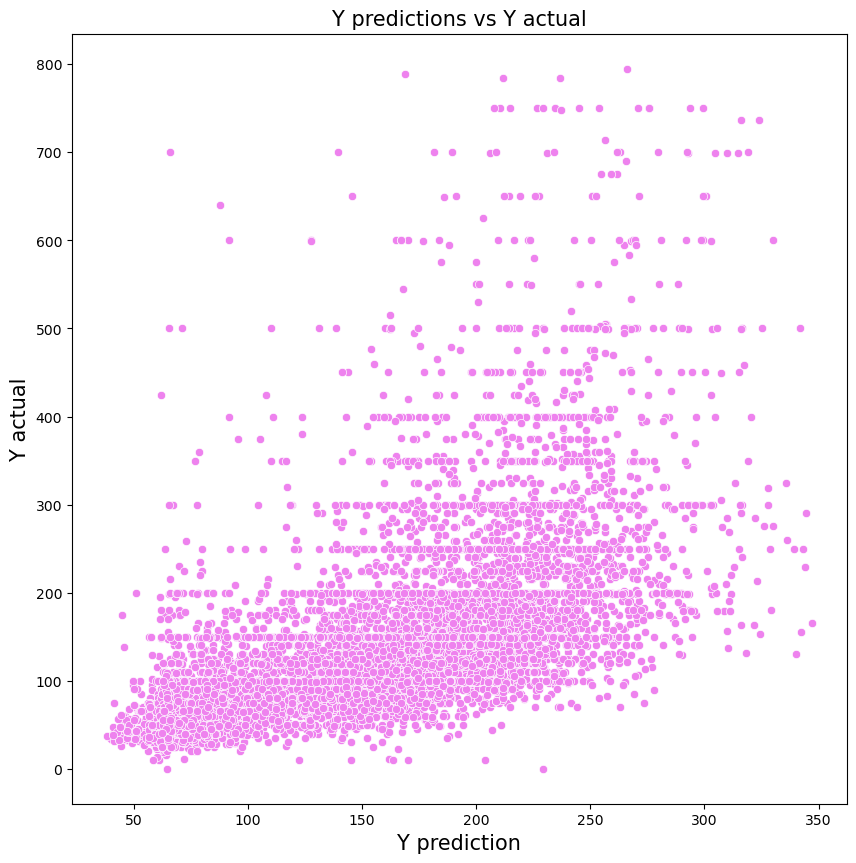

In [410]:
scatterplot_function_evaluation(y_predictions.flatten(), y_test, color='violet')